## LDA Topic Modelling: Reading a discover report CSV.

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [12]:
# Importing modules
import pandas as pd
import os
import re

# Read data into papers
papers = pd.read_csv("narendra_modi_report_csv.csv")
papers.head()
papers['text']

0        Now that Narendra Modi and Amit Shah live ther...
1        "Plans Come From Small Set Of Personalities Ar...
2        RT @rupagulab@twitter.comI’m totally sick of N...
3        Narendra Modi protects his country from Islam ...
4        Delighted that the Lok Sabha has passed the Ci...
                               ...                        
35132    Asean must not give up on India ... yetJapanes...
35133    Home minister Amit Shah on Monday used the BJP...
35134    The All-India Anglo-Indian Association has wri...
35135    Mumbai, December 09 2019: The Shiv Sena has de...
35136    Imphal, December 09 2019: Chief Minister N.Bir...
Name: text, Length: 35137, dtype: object

In [4]:
# Load the regular expression library

# Remove punctuation

papers['paper_text_processed'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    now that narendra modi and amit shah live ther...
1    "plans come from small set of personalities ar...
2    rt @rupagulab@twittercomi’m totally sick of na...
3    narendra modi protects his country from islam ...
4    delighted that the lok sabha has passed the ci...
Name: paper_text_processed, dtype: object

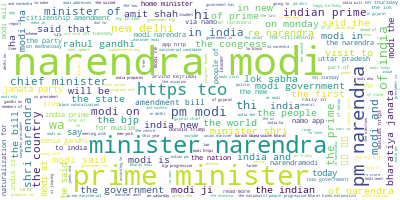

In [6]:
# Word Cloud Library

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

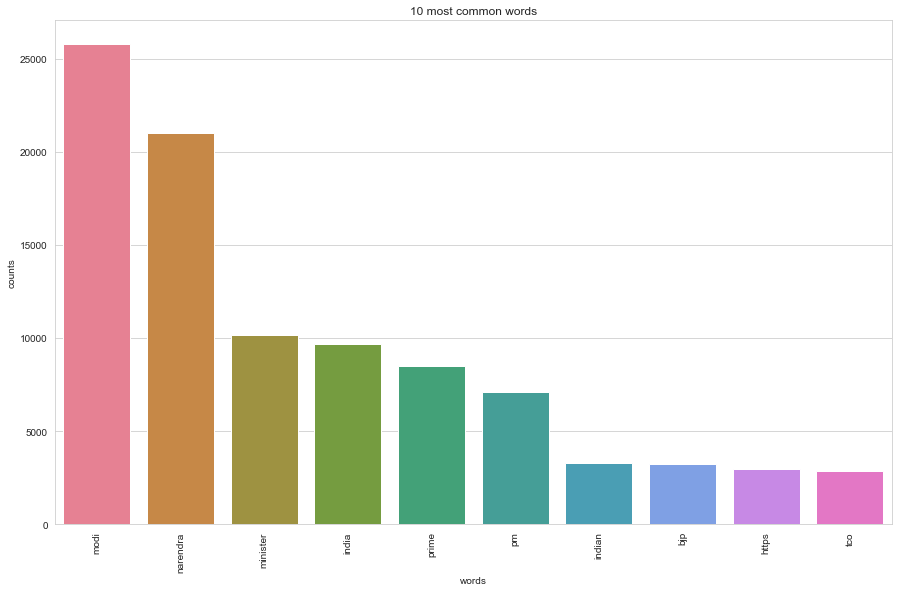

In [8]:
# Visualize 10 most common used terms

# Load the library with the CountVectorizer method of 'scikit-learn' library
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [11]:
# LDA model training and results visualization

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 3
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
https tco modi

Topic #1:
modi narendra india

Topic #2:
modi narendra minister

Topic #3:
modi narendra pm

Topic #4:
modi narendra minister
